In [2]:
import os
import glob
import json
import cv2
import mmcv
from moviepy.video.io.ffmpeg_tools import ffmpeg_extract_subclip
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = json.load(open('/home/ubuntu/oljike/data/operators_processed_vids/2020_11_25_St.Andrews_at_VirginiaMilitary_orig/2020_11_25_St.Andrews_at_VirginiaMilitary_genius_events_annotation_processing.json'))

In [46]:
data['events'][0]

{'event_type': 'two_points_made',
 'frame_num': 1310,
 'event_id': None,
 'sportradar_event_id': None,
 'team': 'away_team',
 'region': None,
 'event_val': '2',
 'old_val': None,
 'game_clock': '19:41',
 'shot_clock': None,
 'period': 1,
 'effective_frame_num': 1310,
 'game_moment_frame_num': None,
 'shot_frame_num': 1105,
 'shot_location': [890.6084243369735, 368.4882108183079],
 'shot_location_projected': None,
 'defender_location': [801.7472698907957, 357.50346740638],
 'defender_location_projected': None,
 'defender_jersey': 10,
 'assist_frame_num': 1053,
 'assist_location': [685.9282371294852, 463.3564493758669],
 'assist_location_projected': None,
 'assist_jersey': 2,
 'assist_attacker_location': [1163.182527301092, 401.44244105409155],
 'assist_attacker_location_projected': None,
 'assist_received_frame_num': 1078,
 'assist_received_location': [977.4726989079563, 340.52704576976424],
 'assist_received_location_projected': None,
 'secondary_assist_frame_num': None,
 'secondary_as

In [14]:
vid_path = '/home/ubuntu/oljike/data/operators_processed_vids/2020_11_25_St.Andrews_at_VirginiaMilitary_orig/2020_11_25_St.Andrews_at_VirginiaMilitary_orig.mp4'
out_dir = '/home/ubuntu/oljike/data/operators_processed_vids/2020_11_25_St.Andrews_at_VirginiaMilitary_orig/'

In [43]:

tgt_frames = []
for ev in data['events']:
    if ev['assist_jersey']:
        tgt_frames.append(ev['assist_frame_num'])
        
        
print(len(tgt_frames), tgt_frames[0])

73 1053


In [59]:
en = 0
frame_id = tgt_frames[en]

vid = mmcv.VideoReader(vid_path)
tgt_frame = vid.get_frame(frame_id)
tgt_frame = cv2.cvtColor(tgt_frame, cv2.COLOR_BGR2RGB)

loc = data['events'][en]['assist_location']
print(tgt_frame.shape)

(720, 1280, 3)


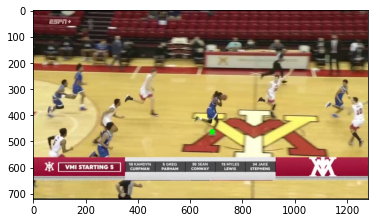

In [58]:
tgt_frame = cv2.circle(tgt_frame, (int(loc[0]), int(loc[1])), radius=10, color=(0, 255, 0), thickness=-1)
plt.imshow(tgt_frame)

### Check OCR

In [28]:
data = json.load(open('/home/ubuntu/oljike/data/operators_processed_vids/2021_01_20_Colorado_at_Washington_orig/2021_01_20_Colorado_at_Washington_ocr.json'))

In [29]:
cnt = 0
for en, (k,v) in enumerate(data['results'].items()):
    if data['results'][k]['game_clock_running']:
        cnt +=1
        
print(cnt, len(data['results']))

0 172920


In [23]:
data['results']['1000']['score_bug_present'], data['results']['1000']['game_clock_running']

(True, False)